## Përshkrimi i problemit
Departamenti i Analizës së kredive në një bankë merret me të gjitha kreditë për shtëpi. Ata operojnë në të gjitha zonat urbane, gjysmë urbane dhe rurale. Klienti-së pari aplikon për një kredi për shtëpi në degën e bankës dhe me pas departamti aprovon ose jo kërkesën e klientit për një kredi.

Banka dëshiron të automatizojë procesin e pranimit të kredisë (në kohë reale) bazuar në detajet e klientit të ofruara gjatë plotësimit të formularit të aplikimit në degë. Këto detaje janë gjinia, statusi martesor, arsimi, numri i personave që varen nga tëardhurat e tij, të ardhurat, shuma e kredisë, Historia e kredisë dhe të tjera. Për të automatizuar këtë proces, ata kanë dhënë një një grup të pjesshëm të të dhënave të bankës të përbërë nga 4269 rastet e fundit të aprovuara ose jo.

### Në këtë model, do të parashikohen që klientët janë të përshtatshëm për një kredi dhe do të kontrollohen se cilat janë kriteret që mungojnë për të ditur pse klienti nërast se klientit nuk i aprovohet kredia .


#### Steps are:


1. [Mbledhja e të dhënave](#1)
2. [Inxhinierimi i tipareve](#2)
3. [Pastrimi i të dhënave](#3)
4. [Analiza eksploruese e të dhënave ](#4)
5. [Parapërpunimi i të dhënave](#5)
6. [Vendimi i Modelit të Machine Learning.](#6)
7. [Akordimi i hiperparametrave](#7)
8. [Vlerësimi i modelit](#8)


# Informacione mbi të dhënat.
----
<table>
    <tr><td> loan_id       </td><td>  ID unike e rastit të kredisë</td></tr>
    <tr><td> no_of_dependents</td><td> Numri i personave në ngarkim të aplikantit</td></tr>
    <tr><td> education</td><td>Niveli arsimor i aplikantit</td></tr>
    <tr><td> self_employed</td><td>Nëse aplikanti është i vetëpunësuar ose jo</td></tr>
    <tr><td> income_annum</td><td>Të ardhurat vjetore të aplikantit</td></tr>
    <tr><td> loan_amount</td><td>Shuma e kredisë e kërkuar nga aplikanti</td></tr>
<tr><td> loan_tenure</td><td>Kohëzgjatja e kredisë së kërkuar nga aplikanti (në vite)</td></tr>
    <tr><td> cibil_score</td><td>CIBIL score/ Credit score i aplikantit</td></tr>
    <tr><td> residential_asset_value</td><td>Vlera e pasurisë rezidenciale të aplikantit</td></tr>
    <tr><td> commercial_asset_value</td><td>Vlera e aktivit tregtar të aplikantit</td></tr>
    <tr><td> luxury_asset_value</td><td>Vlera e pasurisë së objekteve të luksit të aplikantit</td></tr>
    <tr><td> bank_assets_value</td><td>Vlera e aseteve bankare të aplikantit</td></tr>
<tr><td> loan_status</td><td>Statusi i kredisë (Miratuar/Refuzuar)</td></table></tr>

## Importi i paketave

In [2]:
import pandas as pd
import numpy as np

<a id="1"></a><br>
# 1. Mbledhja e të dhënave


- Sigurohemi që i kemi të gjithë variablat e nevojshëm dhe se e kuptojmë strukturën e grupit të të dhënave, duke përfshirë veçoritë dhe variablin e synuar.

In [3]:
df = pd.read_csv(r"C:\Users\User\Desktop\Enriko Lamaj Master\loan-prediction\Dataset\loan_approval_dataset.csv")

> **Shfaqim një mostët të të dhënave nga grupi**

In [202]:
df.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
2816,2817,4,Graduate,No,5100000,12200000,14,511,2700000,6000000,18300000,3400000,Rejected
2492,2493,5,Not Graduate,No,200000,600000,16,396,0,0,500000,200000,Rejected
1751,1752,1,Graduate,Yes,7500000,19900000,10,669,1800000,8800000,18100000,7300000,Approved
1399,1400,0,Graduate,No,4800000,15100000,6,848,1300000,300000,18800000,3500000,Approved
1157,1158,3,Not Graduate,No,1300000,3600000,16,624,2400000,2300000,3300000,1900000,Approved


<a id="2"></a><br>
# 2. Inxhinierimi i tipareve 

> ### **Pasi të kemi mbledhur të dhënat, hapi tjetër duhet të kuptojmë se çfarë lloj të dhënash kemi..**

In [203]:
columns_to_remove = ['loan_id']

# Heqim loan_id nga lista e variablave pasi cdo rresht i të dhënave do të trajtohet si unik
df.drop(columns=columns_to_remove, inplace=True)

In [204]:
# Shfaq formën e grupit të të dhënave (rreshtave, kolonave) 
print("Forma e të dhënave:", df.shape)

Forma e të dhënave: (4269, 12)


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [206]:
# Asetet e lëvizshme
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Asetet e Palëvizshme
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

In [207]:
# Drop columns
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)

In [208]:
def uniquevals(col):
    print(f'Vlera unike në {col} janë : {df[col].unique()}')
    
def valuecounts(col):
    print(f'Numri i vlerave në {col} është: {len(df[col].value_counts())}')
    
    
    
    
for col in df.columns:
    valuecounts(col)
#     uniquevals(col)
    print("-"*75)

Numri i vlerave në  no_of_dependents është: 6
---------------------------------------------------------------------------
Numri i vlerave në  education është: 2
---------------------------------------------------------------------------
Numri i vlerave në  self_employed është: 2
---------------------------------------------------------------------------
Numri i vlerave në  income_annum është: 98
---------------------------------------------------------------------------
Numri i vlerave në  loan_amount është: 378
---------------------------------------------------------------------------
Numri i vlerave në  loan_term është: 10
---------------------------------------------------------------------------
Numri i vlerave në  cibil_score është: 601
---------------------------------------------------------------------------
Numri i vlerave në  loan_status është: 2
---------------------------------------------------------------------------
Numri i vlerave në Movable_assets është: 484
---------

In [209]:
# zgjidhim dhe ndajmë të gjitha të dhënat sipas tipit të tyre në kategorike dhe numerike
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index([' education', ' self_employed', ' loan_status'], dtype='object'),
 Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
        ' cibil_score', 'Movable_assets', 'Immovable_assets'],
       dtype='object'))

<a id="3"></a><br>
# 3. Pastrimi i të dhënave

In [210]:
import missingno as msno
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

<Axes: >

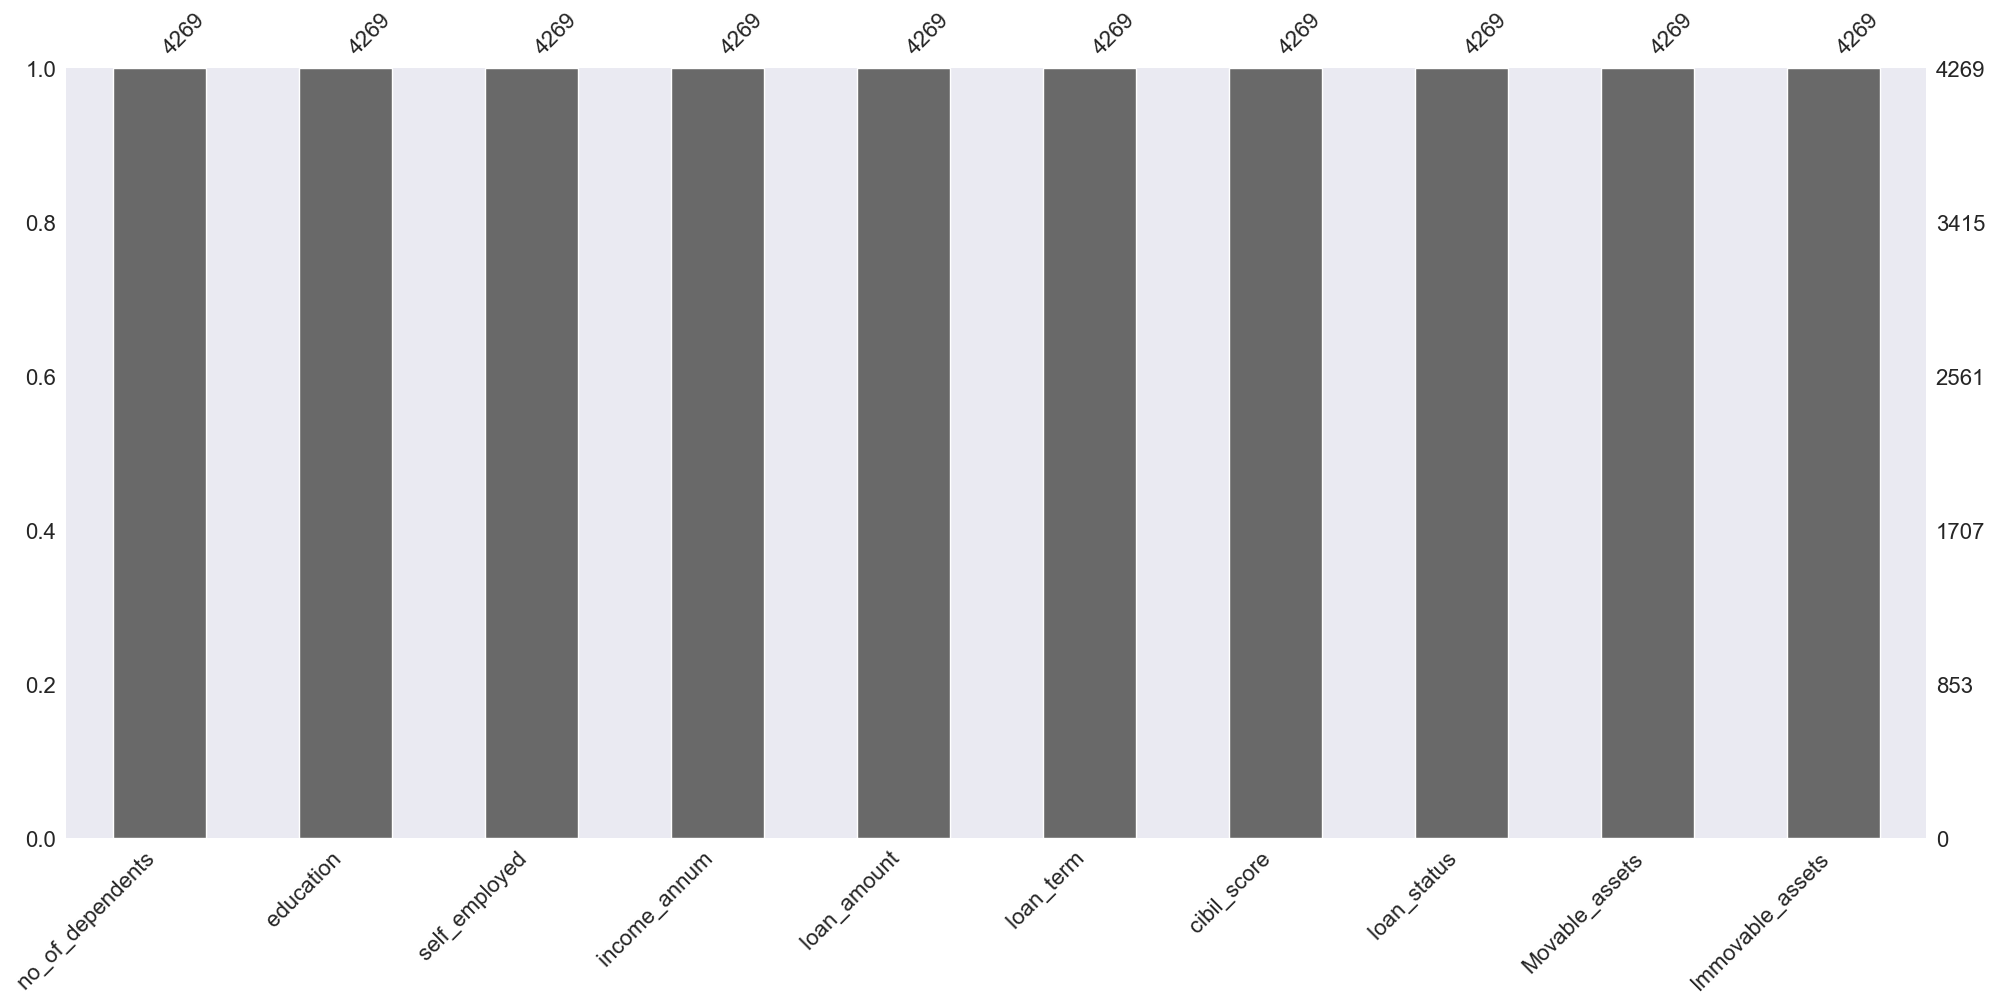

In [211]:
msno.bar(df)

In [212]:
'''
siç tregohet më poshtë, mund të shohim se vlera null nuk ka të pranishme në grupin e të dhënave të miratimit të kredisë'''
print()
df.isna().sum()

 no_of_dependents    0
 education           0
 self_employed       0
 income_annum        0
 loan_amount         0
 loan_term           0
 cibil_score         0
 loan_status         0
Movable_assets       0
Immovable_assets     0
dtype: int64

In [213]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0    no_of_dependents  4269 non-null   int64 
 1    education         4269 non-null   object
 2    self_employed     4269 non-null   object
 3    income_annum      4269 non-null   int64 
 4    loan_amount       4269 non-null   int64 
 5    loan_term         4269 non-null   int64 
 6    cibil_score       4269 non-null   int64 
 7    loan_status       4269 non-null   object
 8   Movable_assets     4269 non-null   int64 
 9   Immovable_assets   4269 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 333.6+ KB


Siç mund ta shohim nga outputet.

- Ka 4269 raste input
- Ka gjithsej 12 veçori (0 deri në 11)
- Ekzistojnë tre lloje të tipeve të të dhënave d: int64 (9), objekt (3)
- Gjithashtu, ne mund të kontrollojmë se sa vlera mungojnë në kolonën Non-Null Count

<a id="4"></a><br>
# 4. Analiza eksploruese e të dhënave 


In [215]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# sns.set_style('dark')

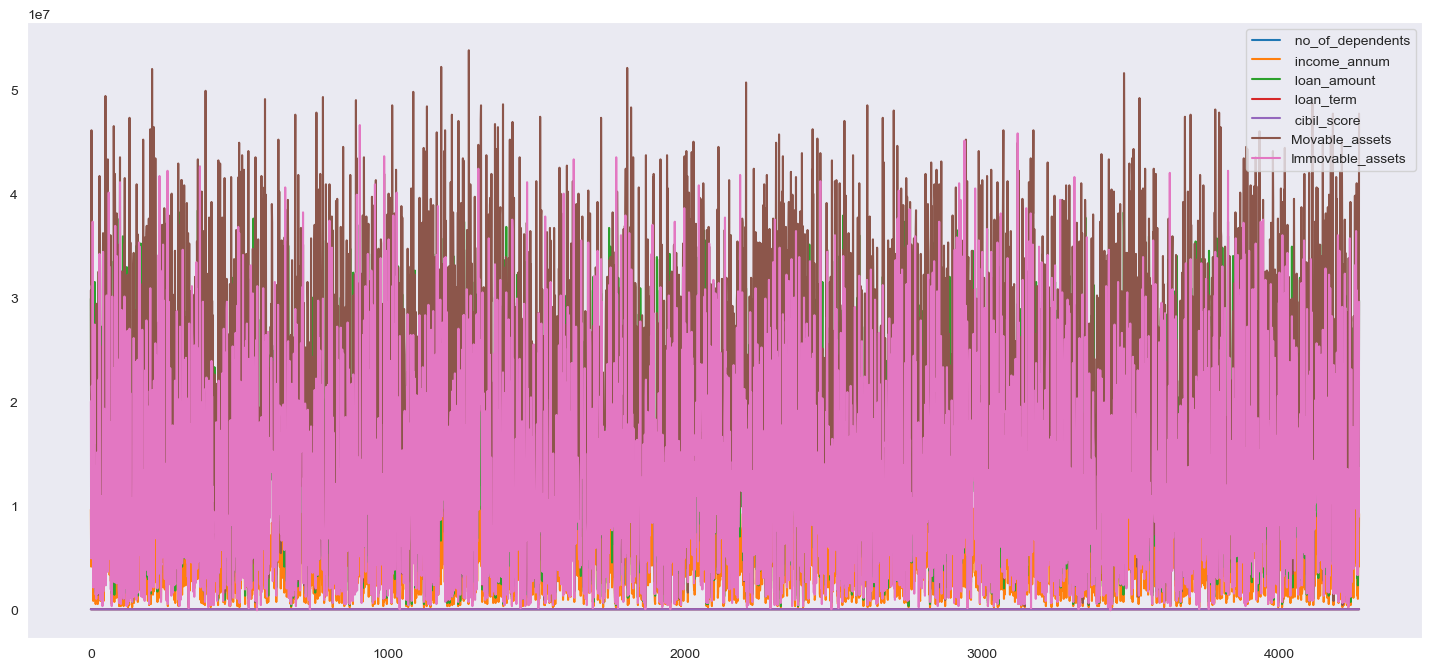

In [216]:
df.plot(figsize=(18, 8))

plt.show()

## Shpërndarja e numrit të personave në ngarkim

Text(0.5, 1.0, 'Numri i personave në ngarkim')

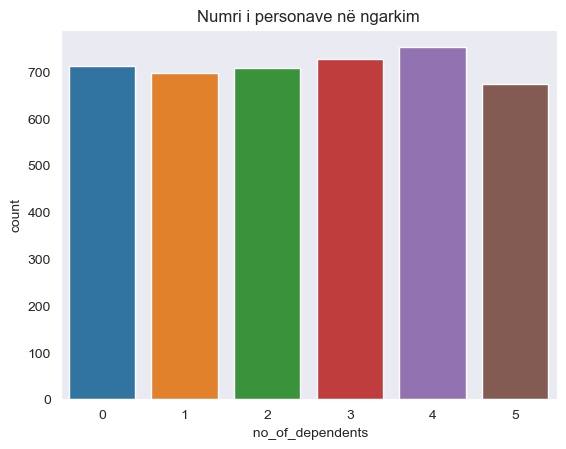

In [217]:
sns.countplot(x = ' no_of_dependents', data = df).set_title('Numri i personave në ngarkim')

> Grafiku ilustron numrin e individëve në varësi të lidhur me aplikantët për kredi, duke zbuluar një kontrast nga 0 në 5. Nuk ka shumë dallime në numrin e personave në ngarkim nëse i referohemi numrit per secilën kategori, megjithatë duke qenë se numri i personave në ngarkim rritet, të ardhurat e disponueshme të aplikantit zvogëlohen. Pra, supozoj se numri i aplikantëve me 0 ose 1 persona do të ketë shanse më të larta për miratimin e kredisë.**

## Numri i personave në ngarkim kundrejt statusit të kredisë

<Axes: xlabel=' no_of_dependents', ylabel='count'>

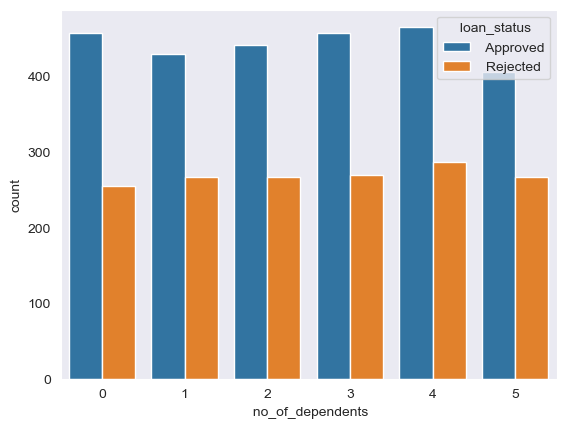

In [218]:
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')

> Grafiku na tregon numrin e anëtarëve në familje për të cilët aplikanti kujdeset, kundrejt statusit të aplikimit për kredi. Rezultati i grafikut tregon se numri i personave që marrin miratimin për kredi nuk ndryshon shumë, edhe nëse kanë më shumë anëtarë në familje. Kjo do të thotë se supozimi  që kreditë mund të miratohen më rrallë për njerëzit me më shumë anëtarë në familje nuk është vërtet i drejtë, bazuar në këtë grafik. 

## Arsimi dhe të vetëpunësuarit

Text(0.5, 1.0, 'Vetëpunsimi')

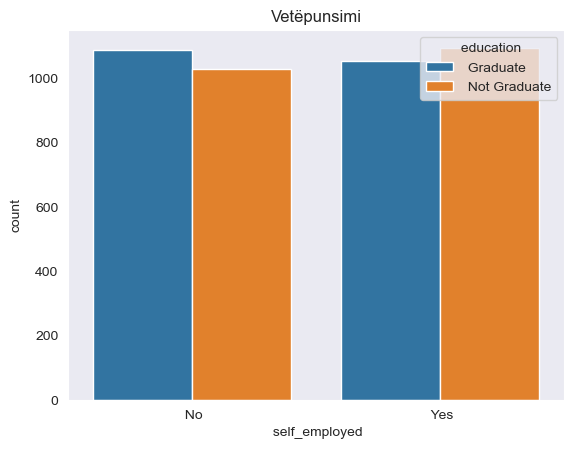

In [219]:
sns.countplot(x=' self_employed', data = df, hue = ' education').set_title('Vetëpunsimi')

>Grafiku që përshkruan marrëdhënien midis statusit të punësimit të aplikantëve dhe niveleve të tyre arsimore nxjerr në pah tendencat e rëndësishme për konsideratat e miratimit të kredisë. Ai zbulon se shumica e aplikantëve jo të diplomuar janë të vetëpunësuar, ndërsa shumica e aplikantëve të diplomuar nuk janë të vetëpunësuar. Kjo tregon se të diplomuarit kanë më shumë gjasa të punësohen në pozita me pagë, ndërsa të padiplomuarit priren të jenë të vetëpunësuar. 
 `Ky dallim ka implikime për vendimet e miratimit të kredisë. Prirja e të diplomuarve për punësim të qëndrueshëm me pagë sugjeron një burim të ardhurash më të parashikueshme, duke rritur potencialisht aftësinë e tyre për të shlyer kreditë. Në të kundërt, të vetëpunësuarit e padiplomuar mund të kenë të ardhura më të luhatshme, duke paraqitur sfida për shlyerjen e vazhdueshme të kredisë.`
 Megjithatë, është e rëndësishme të theksohet se individët e vetëpunësuar midis jo të diplomuarve mund të kenë gjithashtu potencialin për të fituar të ardhura më të larta, duke kundërshtuar potencialisht shqetësimet e paqëndrueshmërisë së të ardhurave. 
 `Marrja në konsideratë e këtij ndërveprimi ndërmjet arsimit, statusit të punësimit dhe ndryshueshmërisë së mundshme të të ardhurave është thelbësore kur parashikohen rezultatet e miratimit të kredisë. Një vlerësim gjithëpërfshirës i këtyre faktorëve është i nevojshëm për të vlerësuar me saktësi aftësitë financiare dhe potencialin e ripagimit të aplikantëve. Grafiku nënvizon kompleksitetin e këtyre konsideratave dhe nevojën për një qasje holistike në vlerësimin e aplikantëve për kredi.`

## Arsimi dhe të ardhurat

<Axes: xlabel=' education', ylabel=' income_annum'>

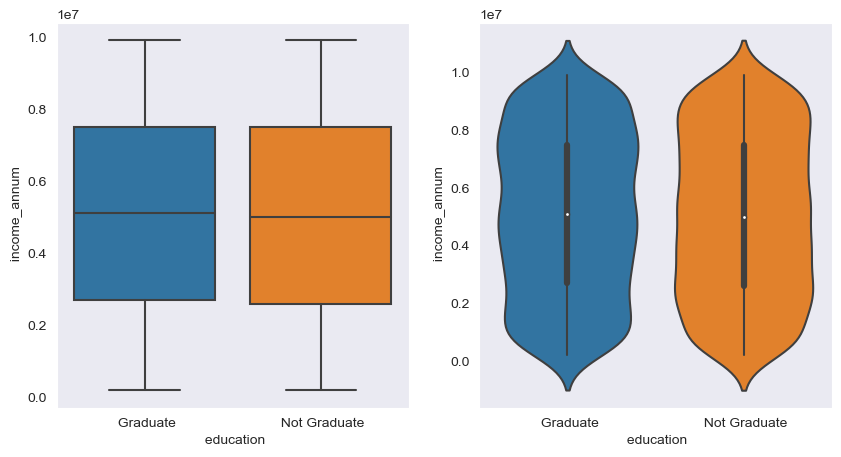

In [220]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1])

>Kombinimi i vizualizimeve të boksploteve dhe violinplotit ofron njohuri mbi marrëdhëniet midis niveleve të arsimimit të aplikantëve për kredi dhe të ardhurave të tyre vjetore. Boxploti zbulon se si të diplomuarit ashtu edhe ata jo të diplomuar kanë të ardhura mesatare të ngjashme, duke treguar se të kesh një diplomë nuk çon domosdoshmërisht në një avantazh të konsiderueshëm të të ardhurave. Për më tepër, violinploti tregon shpërndarjen e të ardhurave ndërmjet të diplomuarve dhe aplikantëve jo të diplomuar, ku mund të shohim se aplikantët jo të diplomuar kanë një shpërndarje të barabartë midis të ardhurave `2000000` dhe `8000000`, ndërsa ka një shpërndarje të pabarabartë midis të diplomuarve me më shumë aplikantë me të ardhura midis `6000000`. dhe `8000000` Meqenëse nuk ka shumë ndryshime në të ardhurat vjetore të të diplomuarve dhe jo të diplomuarve, supozoj se arsimi nuk luan një rol të madh në miratimin e kredisë.**

## Statusi i arsimit kundrejt statusit të aplikimit për kredi

Text(0.5, 1.0, 'Statusi i kredisë kundrejt Edukimit')

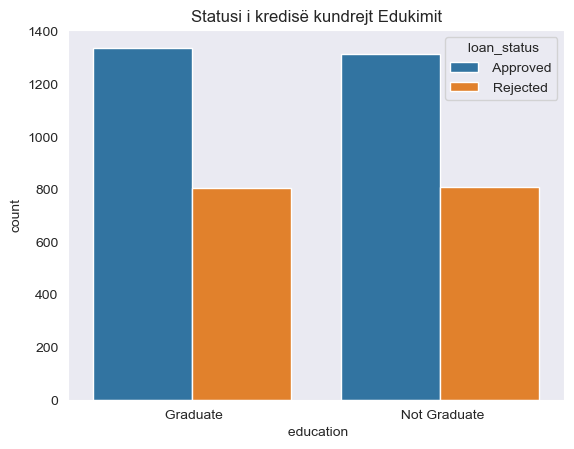

In [221]:
sns.countplot(x = ' education', hue = ' loan_status', data = df).set_title('Statusi i kredisë kundrejt Edukimit')

>Grafiku tregon se ka vetëm një ndryshim të vogël midis numrit të kredive të miratuara dhe të refuzuara si për aplikantët e diplomuar ashtu edhe për ata jo-diplomuar. Ky ndryshim është aq i vogël sa nuk duket të jetë i rëndësishëm.

## Shuma dhe Kohzgjatja e kredisë

Text(0.5, 1.0, 'Shuma e kredisë kundrejt Kohzgjatjas së kredisë')

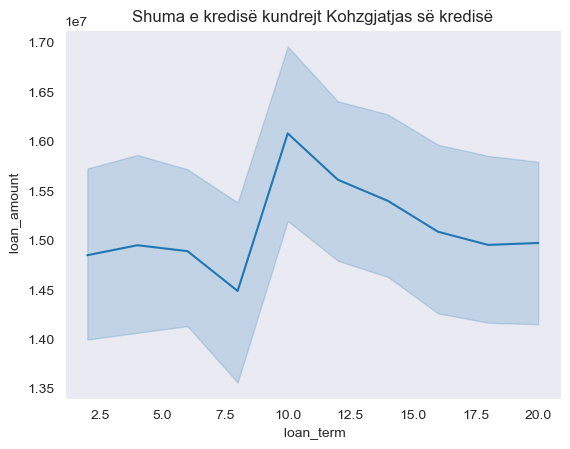

In [222]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title('Shuma e kredisë kundrejt Kohzgjatjas së kredisë')

In [223]:
df.head(1)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000


> Kjo grafik tregon tendencën midis shumës së kredisë dhe afatit të huasë. Ndërmjet kohëzgjatjes së huasë prej `2,5 - 7,5` vite shuma e huasë është ndërmjet `1400000 - 15500000`. Megjithatë, shuma e kredisë është dukshëm më e lartë për afatin e huasë prej '10 vitesh'.

## Shuma e kredisë dhe Statusi i kredisë

<Axes: xlabel=' loan_status', ylabel=' loan_amount'>

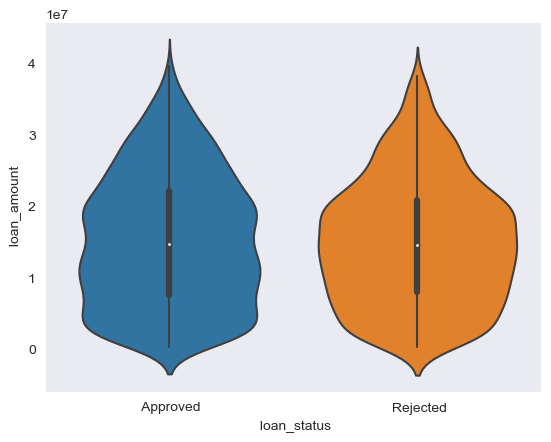

In [224]:
sns.violinplot(x=' loan_status', y=' loan_amount', data=df)

## Shuma dhe kohëzgjatja e kredisë kundrejt statusit të kredisë

<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

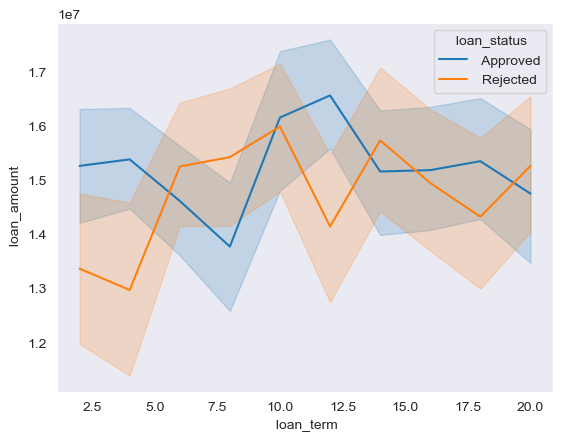

In [225]:
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')

> Grafiku tregon se si janë të lidhura shuma e kredisë, koha për të shlyer dhe miratimi i kredisë. Është e qartë se kreditë që pranohen shpesh kanë shuma më të larta dhe kohë më të shkurtra shlyerjeje. Nga ana tjetër, huatë që refuzohen zakonisht janë për shuma më të ulëta dhe periudha më të gjata shlyerjeje. Kjo mund të jetë për shkak se banka preferon të miratojë kredi që janë më të lehta për t'u kthyer shpejt dhe që sjellin më shumë fitim. Ata mund të mos duan të merren me kredi shumë të vogla për shkak të kostove të përfshira. Megjithatë, variabla të tjera si sa i besueshëm është personi që merr hua, gjithashtu kanë rëndësi në këto vendime. Grafiku na jep një paraqitje të shkurtër sesi bankat analizojnë kur vendosin të miratojnë ose refuzojnë kreditë.

## Shpërndarja e CIBIL Score/ Credit Score

> Përpara se të shikojmë CIBIL Score, le të shohim diapazonin e CIBIL Score dhe kuptimin të tyre.


\begin{array}{|c|c|} \hline
CIBIL & Kuptimi \\ \hline
300-549 & I dobët  \\
550-649 & Mjaftueshëm  \\
650-749 & Mirë  \\
750-799 & Shumë Mirë  \\
800-900 & Shkelqyshëm \\ \hline
\end{array}

<Axes: xlabel=' cibil_score', ylabel='Count'>

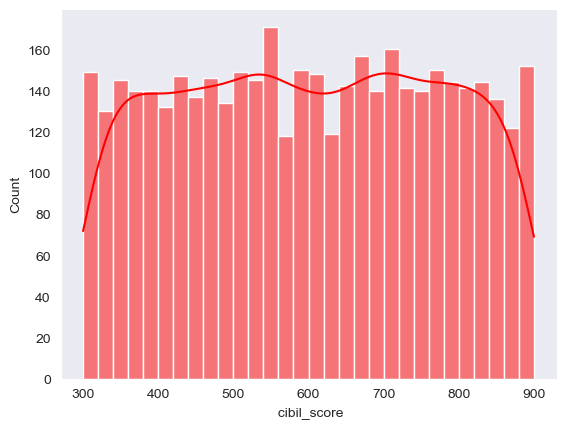

In [226]:
# viewing the distribution of the cibil_score column
sns.histplot(df[" cibil_score"],bins=30, kde=True, color='red')

>Duke parë grafikun, shumica e klientëve kanë CIBIL score të ulët (nën 649), gjë që mund ta vështirësojë marrjen e aprovimit të kredive. Por ka një numër të madh klientësh me rezultate të larta (mbi 649), gjë që është pozitive për bankën. Banka mund t'u japë këtyre klientëve me rezultate të larta trajtim të veçantë si oferta dhe norma më të mira për t'i tërhequr ata të marrin kredi nga banka. Bazuar në këtë, mund të hamendësojmë se personat me CIBIL score të lartë kanë më shumë gjasa per tu aprovuar kreditë. Kjo është për shkak se rezultatet më të larta zakonisht do të thotë se ata janë më të mirë me para apo menaxhimin e trye. 
Në përgjithësi, banka mund ta përdorë këtë informacion për të marrë vendime që ndihmojnë si bankën ashtu edhe klientët e saj.

## CIBIL Score kundrejt statusit të kredisë

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

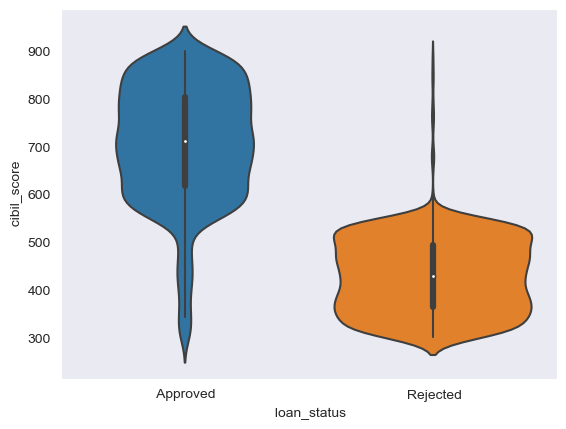

In [227]:
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)

> Grafiku me forma (violinplot) tregon se klientët të cilëve u janë miratuar kreditë kanë tendencë të kenë CIBIL score më të lartë, kryesisht mbi 600. Por për ata, kreditë e të cilëve janë refuzuar, rezultatet janë më të përhapura dhe zakonisht më të ulëta se 550. Kjo do të thotë të kesh një CIBIL score më të lartë, veçanërisht mbi 600, me të vërtetë rrit shanset për të marrë një kredi. Është e qartë se CIBIL score i lartë është i rëndësishëm për miratimin e kredisë.

## Shpërndarja e aseteve

Text(0.5, 1.0, 'Asetet e Palëvizshme ')

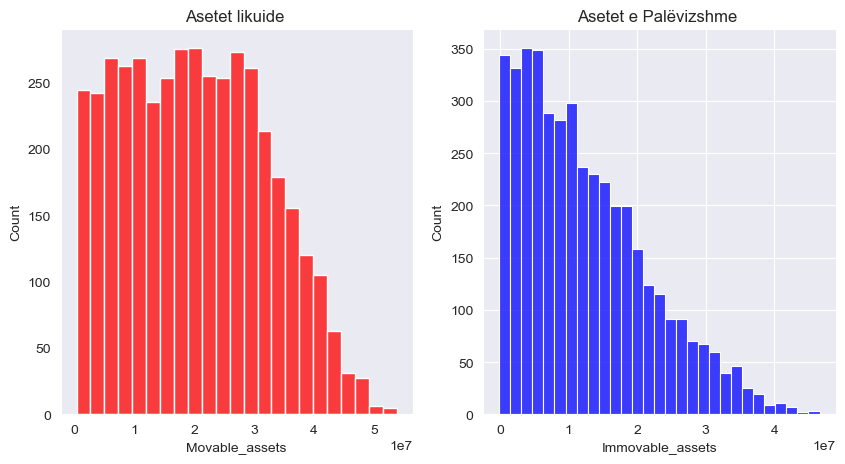

In [228]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
plt.subplot(1, 2, 1)
sns.histplot(df['Movable_assets'], ax=ax[0], color='red')
plt.title("Asetet likuide ")

plt.subplot(1, 2, 2)
plt.grid()
sns.histplot(df['Immovable_assets'], ax=ax[1], color='blue')
plt.title("Asetet e Palëvizshme ")

> Asetet janë vërtet të rëndësishme kur aplikohet për një kredi, sepse ato sigurojnë bankën që klienti mund të paguajë këstet. Llojet ndahen në likuide/të lëvizshme (si llogaritë bankare dhe sende luksi) dhe të palëvizshme/të patundshme (si shtëpitë dhe bizneset). Grafikët tregojnë se sa njerëz kanë këto lloj asetesh.
Për asetet likuide, shumica e njerëzve kanë më pak se 30 milionë, dhe jo shumë kanë shumë më tepër. Për pasuritë e paluajtshme, shumica kanë më pak se 15 milionë, dhe numri i njerëzve zvogëlohet pasi vlera shkon mbi 20 milionë.
Shkurtimisht, këta grafikë na tregojnë se shumica e njerëzve kanë asete me vlerë më të ulët dhe numri i njerëzve me pasuri më të vlefshme zvogëlohet. Na ndihmon të kuptojmë se si aktivet ndikojnë në vendimet e huasë.

## Asetet dhe statusi i kredisë

<Axes: xlabel='Immovable_assets', ylabel='Count'>

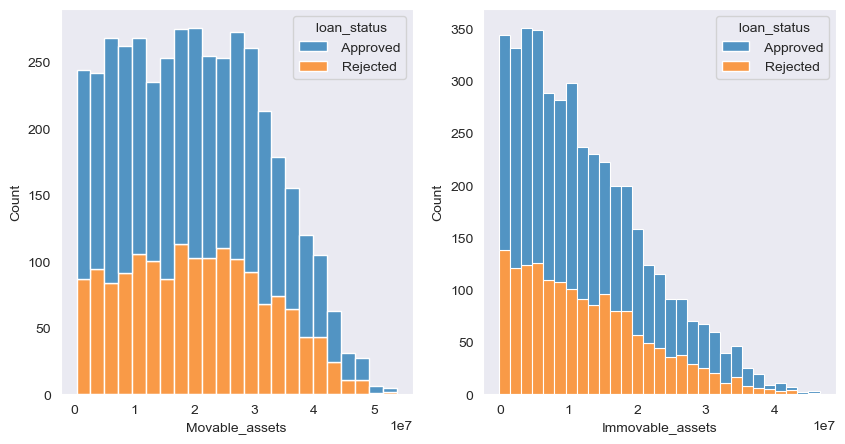

In [229]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = 'Movable_assets', data = df, ax=ax[0], hue = ' loan_status', multiple='stack')
sns.histplot(x =  'Immovable_assets', data = df, ax=ax[1], hue  = ' loan_status', multiple='stack')

> Asetet ofrojnë një rrjet sigurie për bankën kur jep kredi. Këta grafikë tregojnë se si lidhen pasuritë likuide dhe të paluajtshme me miratimin e kredisë. Të dy grafikët tregojnë se me rritjen e aktiveve, gjasat për miratimin e kredisë rriten dhe shanset për refuzim ulen. Për më tepër, grafikët nxjerrin në pah se ka më shumë pasuri likuide sesa ato të paluajtshme.

In [230]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


<a id="5"></a><br>
# 5. Parapërpunimi i të dhënave

## Kodifikimi i variablave kategorike

In [231]:
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [232]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


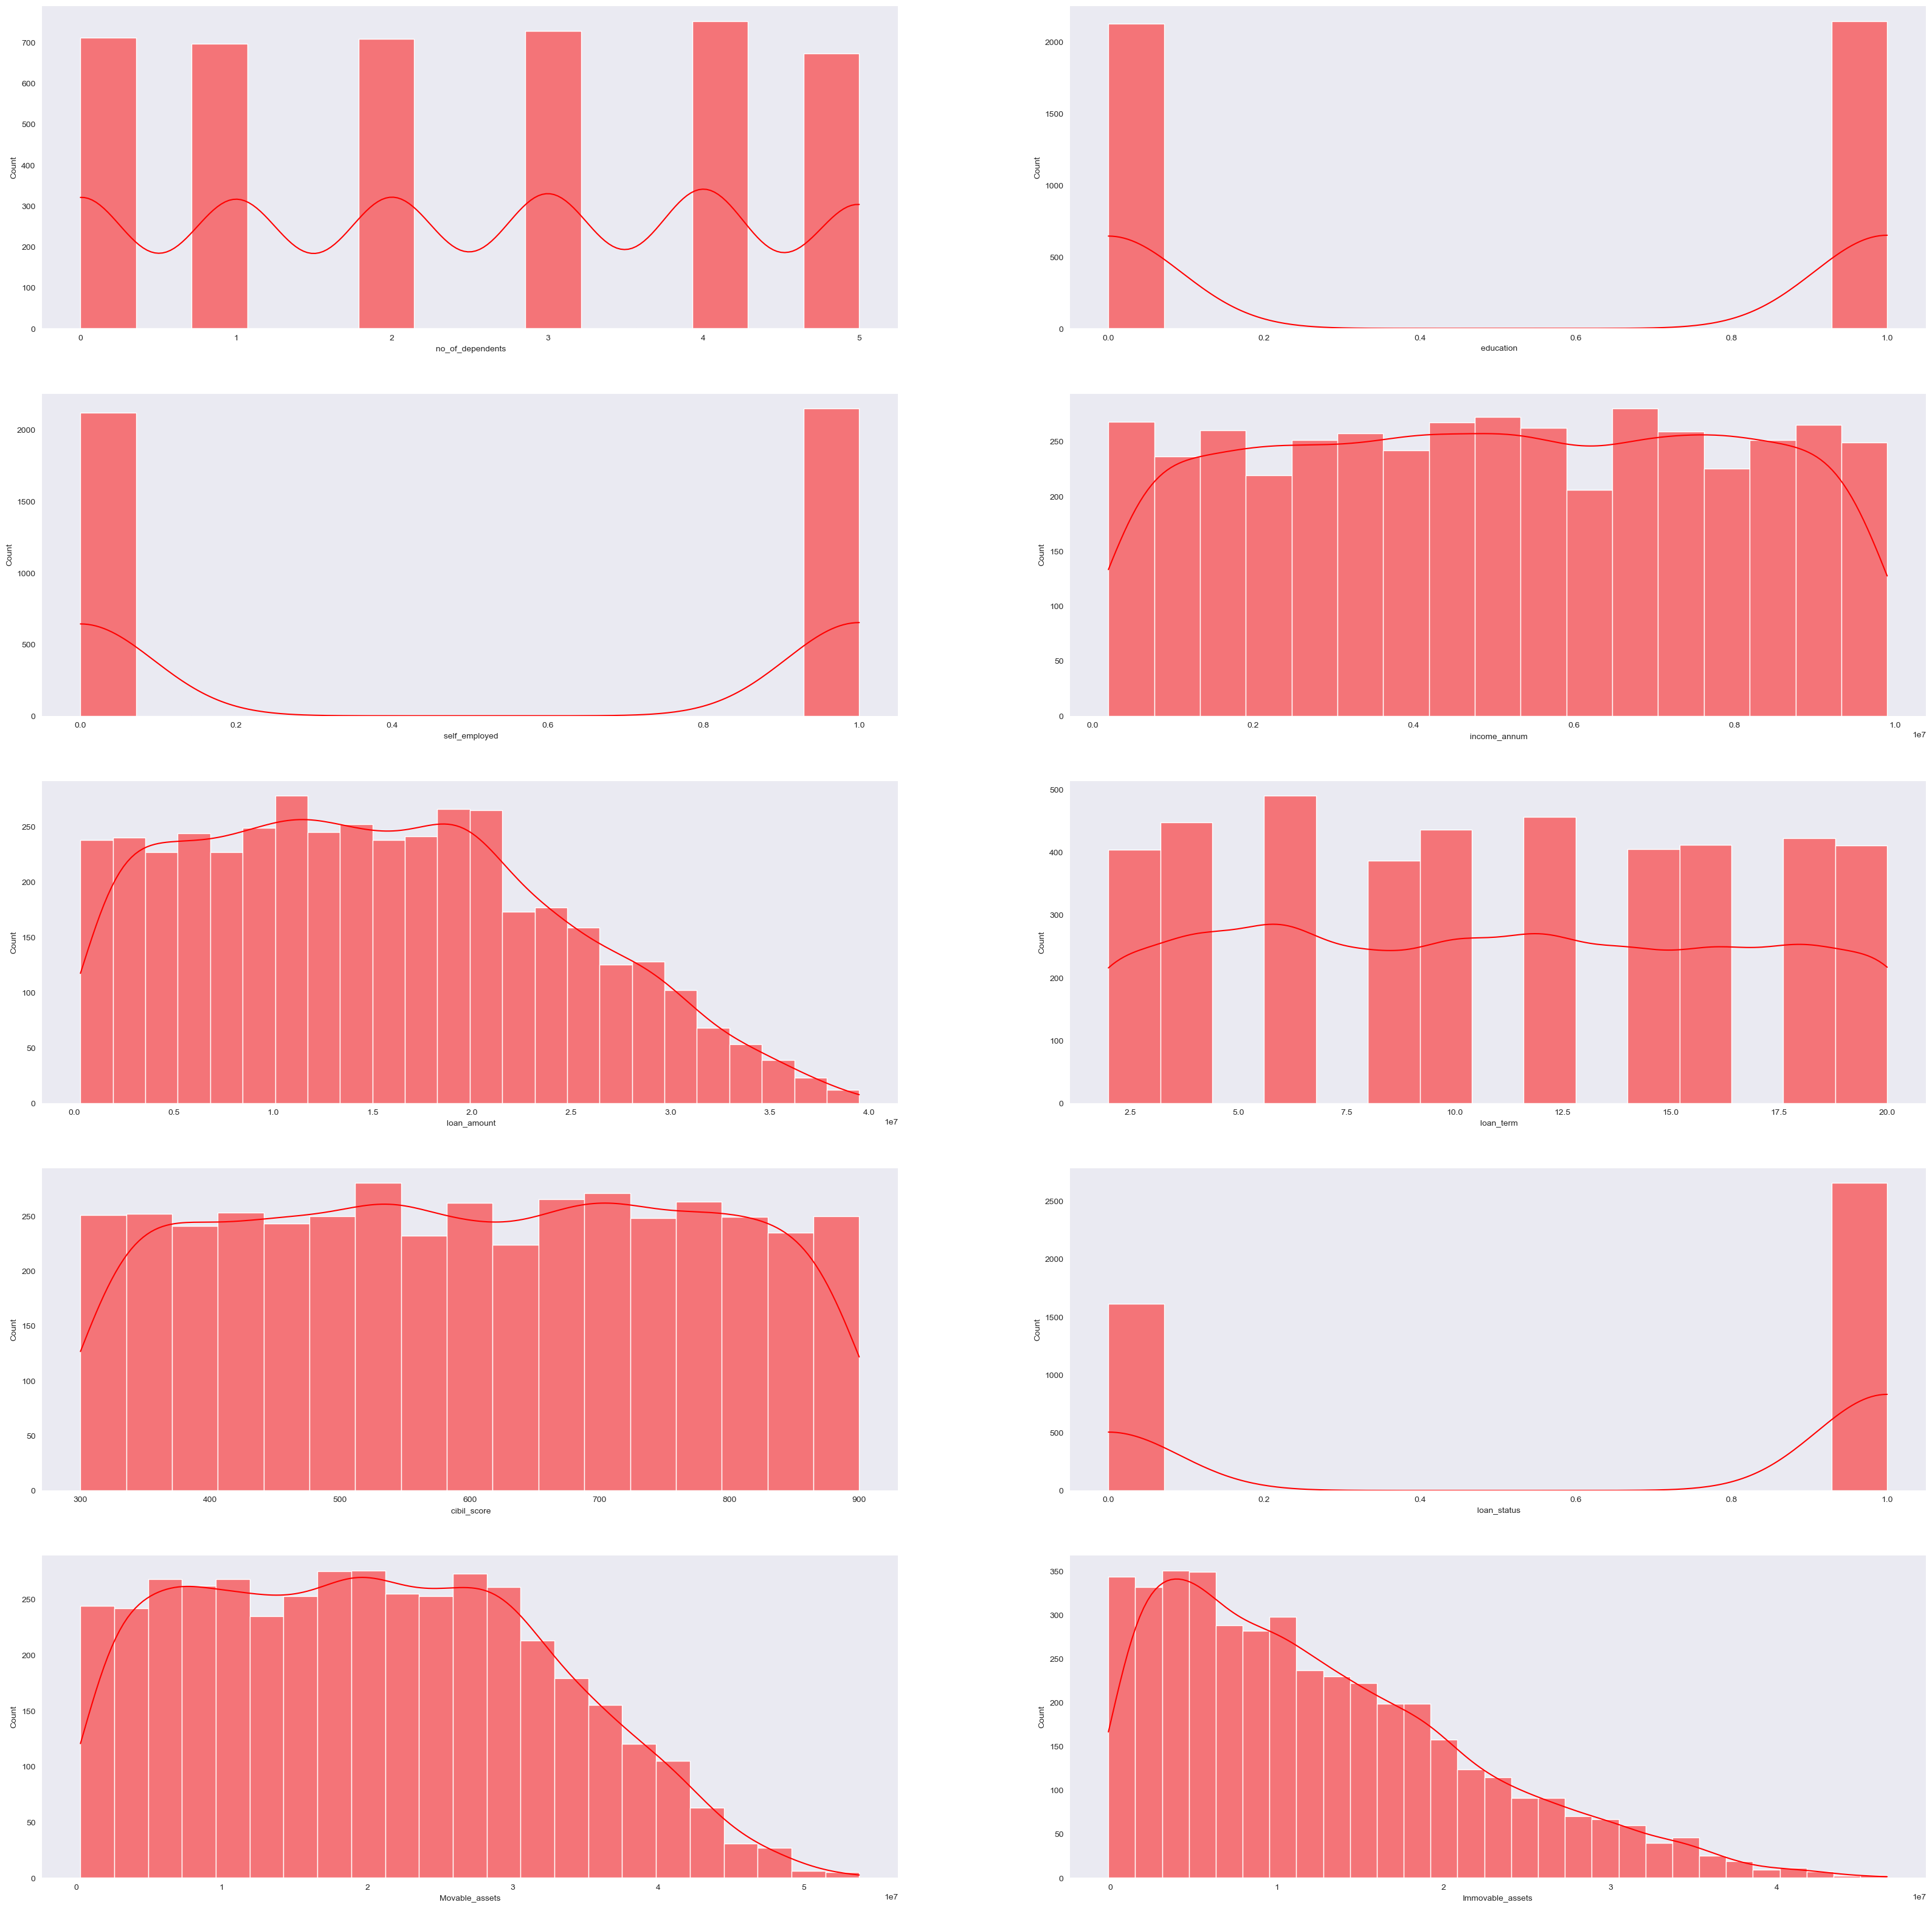

In [233]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
    sns.histplot(df[col],kde=True, color='red', ax = ax)

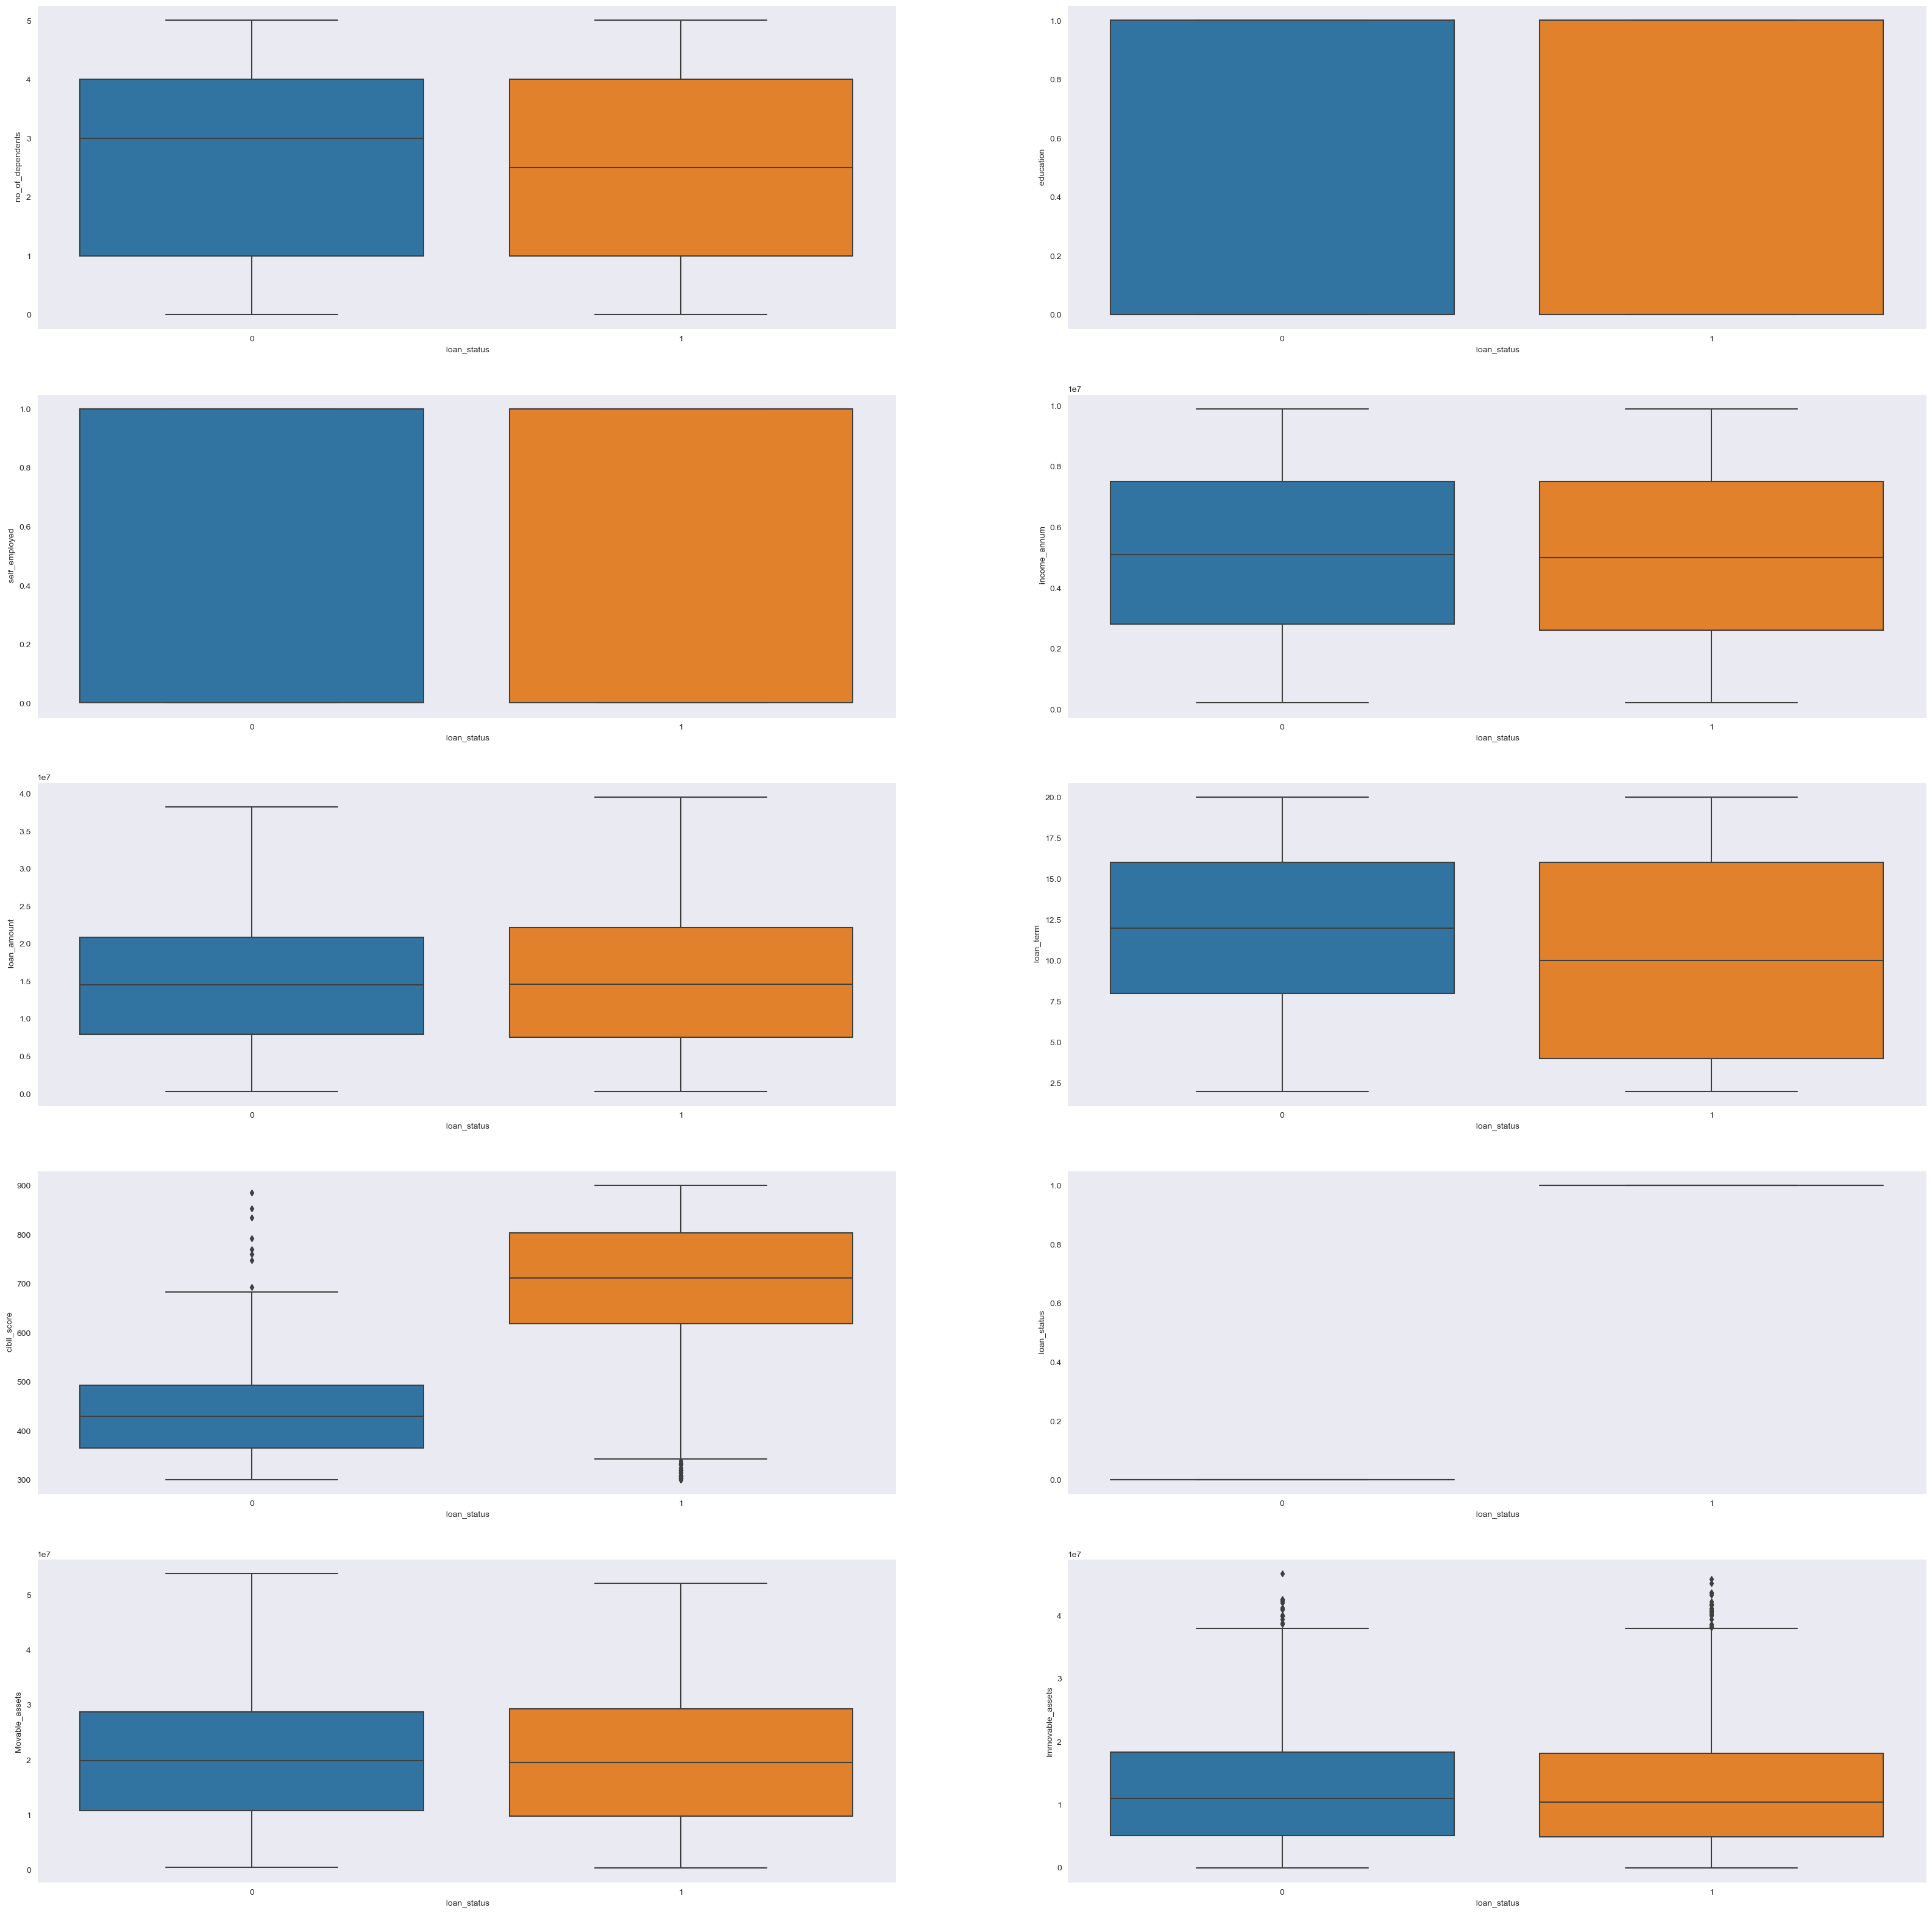

In [234]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
  sns.boxplot(x=' loan_status',y=df[col], ax = ax , data=df)

In [235]:
import warnings

# Suppress warnings within this code block
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

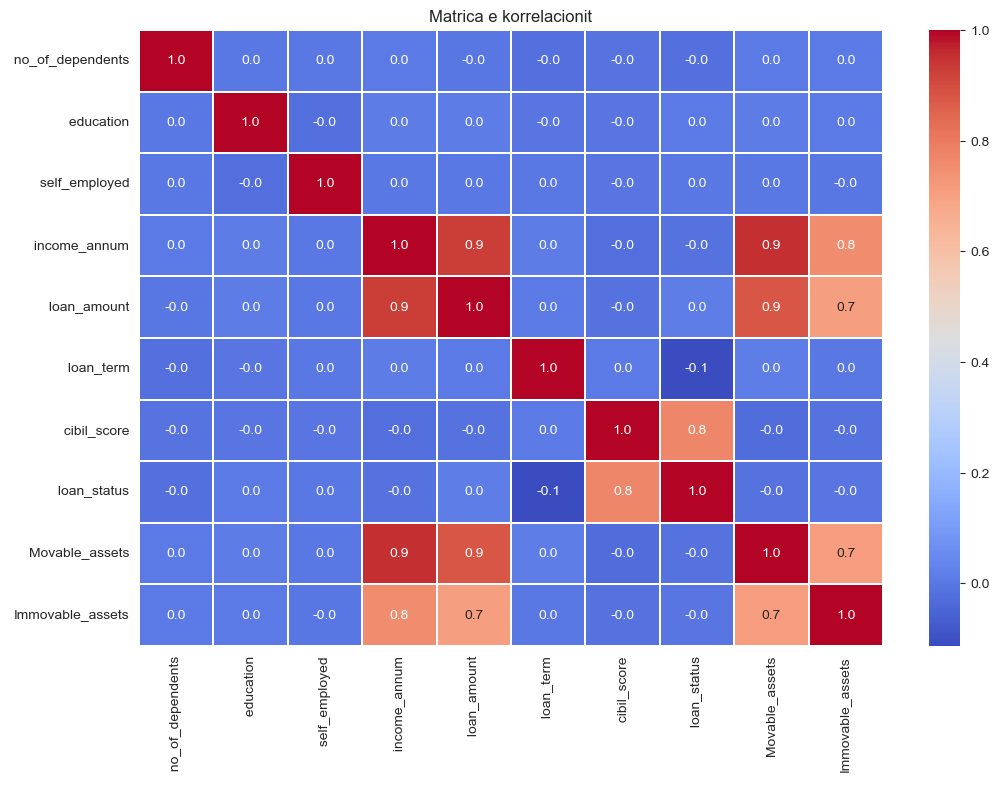

In [236]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1).set_title('Matrica e korrelacionit')
plt.show()

In [237]:
df.corr()[' loan_status']

 no_of_dependents   -0.018114
 education           0.004918
 self_employed       0.000345
 income_annum       -0.015189
 loan_amount         0.016150
 loan_term          -0.113036
 cibil_score         0.770518
 loan_status         1.000000
Movable_assets      -0.013755
Immovable_assets    -0.006200
Name:  loan_status, dtype: float64

Matrica e korrelacionit tregon disa lidhje të forta:

1. **Pasuritë e luajtshme dhe pasuritë e paluajtshme**
2. **Të ardhurat dhe pasuritë e luajtshme**
3. **Të ardhurat dhe pasuritë e paluajtshme**
4. **Aktivet e luajtshme dhe shuma e kredisë**
5. **Aktivet e paluajtshme dhe shuma e kredisë**
6. **Statusi i Huasë dhe Cibil Score**
7. **Shuma e huasë dhe të ardhurat**

Ka kuptim që pasuritë e luajtshme dhe të paluajtshme janë të lidhura, pasi ato janë të dyja llojet e aseteve. Në mënyrë të ngjashme, të ardhurat janë të lidhura me asetet e luajtshme dhe të paluajtshme, pasi klientët me të ardhura më të larta priren të kenë më shumë pasuri.

Tani, le të shohim se si lidhen aktivet me shumën e huasë, si dhe si lidhen të ardhurat me shumën e kredisë. Ne kemi diskutuar tashmë lidhjen midis statusit të kredisë dhe CIBIL score.

## Asetet kundrejt Shumës së kredisë

Text(0.5, 1.0, 'Asetet e palëvizshme kundrejt Shumës')

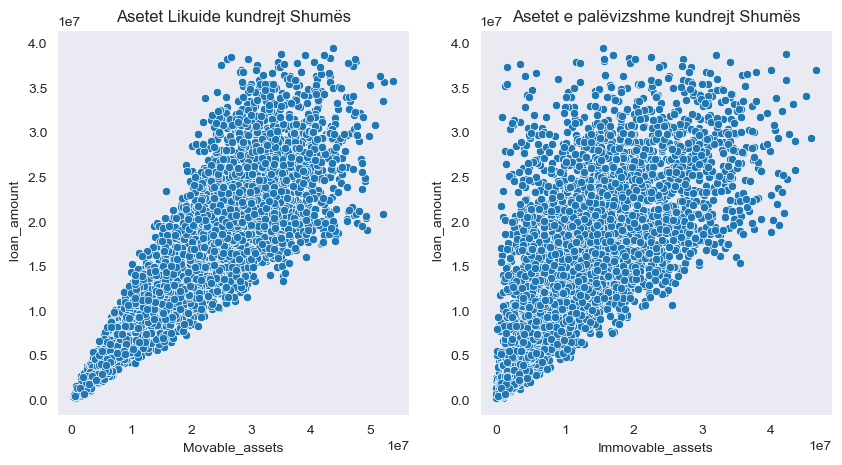

In [238]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x='Movable_assets', y = ' loan_amount', data = df, ax=ax[0]).set_title('Asetet Likuide kundrejt Shumës')
sns.scatterplot(x='Immovable_assets', y = ' loan_amount', data = df, ax=ax[1]).set_title('Asetet e palëvizshme kundrejt Shumës')

> Ka një lidhje pozitive midis shumës së kredisë dhe aktiveve likuide dhe të paluajtshme. Kur një person ka më shumë aktive, qofshin ato likuide (si paratë) ose të paluajtshme (si pasuria), banka priret të ofrojë një shumë më të lartë kredie. Me fjalë të tjera, të kesh më shumë aktive rrit gjasat për të marrë një kredi më të madhe nga banka.

## Shumës së kredisë kundrejt të ardhurave

<Axes: xlabel=' income_annum', ylabel=' loan_amount'>

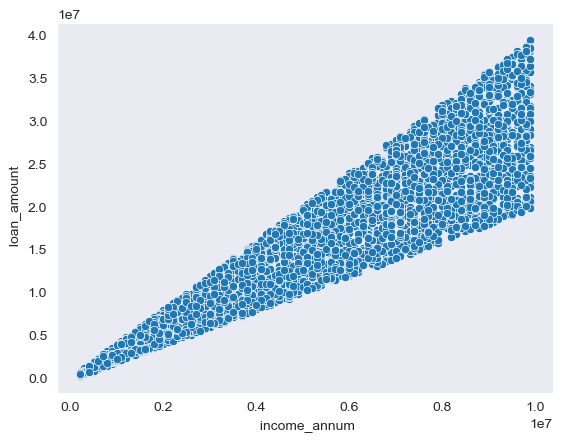

In [239]:
sns.scatterplot(x=' income_annum', y = ' loan_amount', data = df)

> Shuma e kredisë dhe të ardhurat vjetore të aplikantit kanë një lidhje të drejtpërdrejtë. Kur të ardhurat janë më të larta, edhe shuma e kredisë tenton të jetë më e lartë. Kjo për shkak se të ardhurat e aplikantit luajnë një rol të madh në përcaktimin e shumës së duhur të huasë që mund të përballojnë të paguajnë.

<a id="6"></a><br>
# 6.Vendimi i Modelit të Machine Learning.

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn import tree

## Trajnimi i të dhënave të testit

In [241]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(' loan_status', axis=1), df[' loan_status'], test_size=0.2, random_state=42)

## 1. Regresioni Logjistik

In [242]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()

lgr.fit(X_train, y_train)

predictions = lgr.predict(X_test)

In [243]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Saktësia:", accuracy)

Saktësia: 0.6276346604215457


## 2.  Klasifikimi me vektorë ndihmues (Support Vector Classification - SVC)

In [244]:
from sklearn.svm import SVC
model = SVC()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [245]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Saktësia:", accuracy)

Saktësia: 0.6276346604215457


## 3.Klasifikimi me Pemët e Vendimit

In [246]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree object
dtree = DecisionTreeClassifier()

In [247]:
# Trainign the model using the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [248]:
dtree_pred = dtree.predict(X_test)

In [249]:
# Training Accuracy
dtree.score(X_train, y_train)

1.0

In [250]:
# Calculate accuracy
accuracy = accuracy_score(y_test, dtree_pred)
print("Saktësia:", accuracy)

Saktësia: 0.9847775175644028


## 4. Klasifikimi me Pyjet e Rastit

In [251]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()

In [252]:
# Training the model using the training data
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [253]:
# Predicting the Loan Approval Status
rfc_pred = rfc.predict(X_test)

In [254]:
# Calculate accuracy
accuracy = accuracy_score(y_test, rfc_pred)
print("Saktësia:", accuracy)

Saktësia: 0.977751756440281


Text(520.4494949494949, 0.5, 'Actual')

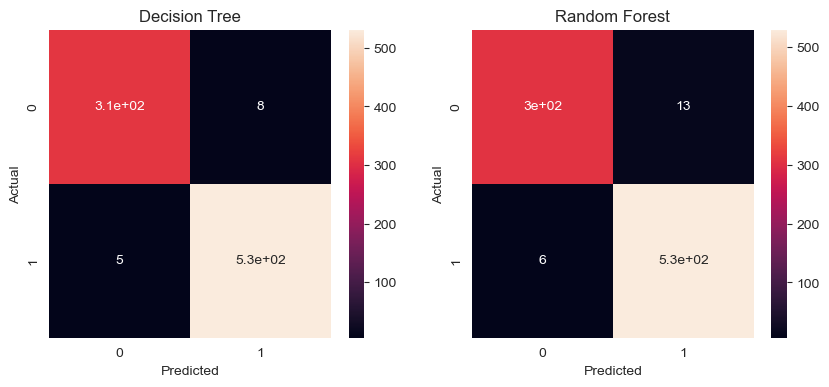

In [255]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

## Konkluzioni

> **Përmbledhje e performancës së modelit për parashikimin e miratimit të kredisë **

> Nga testimi i mënyrave të ndryshme për të parashikuar nëse kreditë do të miratohen apo jo, ne zbuluam se modeli i Pemës së Vendimit funksionoi më mirë. Ishte i saktë dhe mund të parashikonte rezultatet me mjaft saktësi. Modeli i Pyjeve të Rastit gjithashtu bëri një punë të mirë.

> Gjithashtu, modelet e Klasifikimit me vektorë ndihmues ( Support Vector Machine - SVM) dhe Regresioni Logjistik nuk funksionuan mirë për këtë grup të dhënash. Ata nuk parashikuan aq saktë sa modelet e Pemës së Vendimit dhe Pyjeve të Rastit.

> Kjo na tregon se zgjedhja e modelit të duhur është vërtet e rëndësishme. Modelet e Pemës së Vendimit dhe Pyjeve të Rastit ishin të shkëlqyera për këto të dhëna, por SVM dhe Regresioni Logjistik nuk ishin një përshtatje e mirë.

<a id="7"></a><br>
# 7. Akordimi i hiperparametrave
 

## Hiperparametrat për Pyjet e Rastit

In [256]:
import warnings
import numpy as np
warnings.filterwarnings("ignore", category=UserWarning, message="A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy")
numpy_version = np.__version__
print("NumPy Version:", numpy_version)

NumPy Version: 1.24.3


In [257]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [258]:
rfc=RandomForestClassifier()
rf_Grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,verbose=0,n_jobs=-1,return_train_score=False)
rf_Grid.fit(X_train,y_train)
rf_Grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [259]:
rf=RandomForestClassifier(**rf_Grid.best_params_)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [260]:
rfc_pred = rf.predict(X_test)

In [261]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , f1_score
import sklearn.metrics as metrics
y_pred1=rf.predict(X_test)
score_rf=accuracy_score(y_test,y_pred1)
score_rf

0.9730679156908665

In [262]:
f1_rf=f1_score(y_pred1,y_test)
f1_rf

0.9787234042553191

In [263]:
cm = metrics.confusion_matrix(y_test, y_pred1)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       318
           1       0.97      0.99      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



## Hiperparametrat për Pemët e Vendimit

In [264]:
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [265]:
dtree = DecisionTreeClassifier()

In [266]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [267]:
# Make predictions on the test data
predictions = best_model.predict(X_test)

In [268]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Saktësia:", accuracy)

Saktësia: 0.9800936768149883


In [269]:
cm = metrics.confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       318
           1       0.99      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [270]:
f1_dtree=f1_score(predictions,y_test)
f1_dtree

0.9840972871842845

<a id="8"></a><br>
# 8. Vlerësimi i modelit
## Matrica e konfuzionit

Text(520.4494949494949, 0.5, 'Actual')

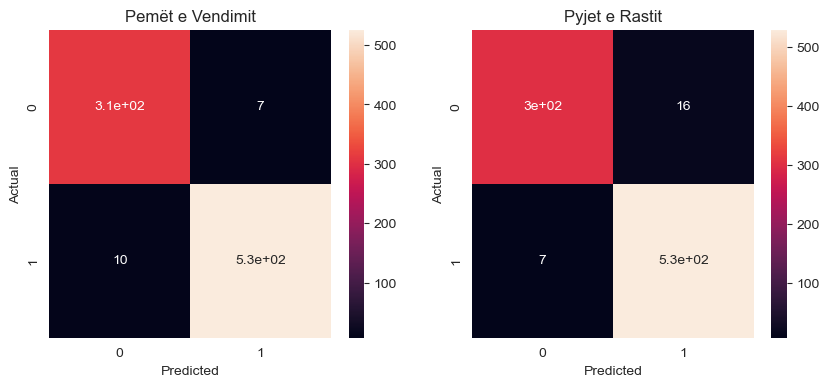

In [271]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, ax=ax[0]).set_title('Pemët e Vendimit')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, ax=ax[1]).set_title('Pyjet e Rastit')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

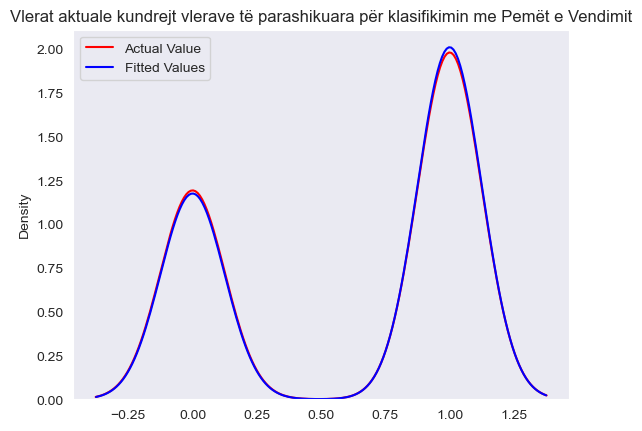

In [272]:
fig, ax = plt.subplots()
sns.kdeplot(predictions, color="r", label="Actual Value", ax=ax)
sns.kdeplot(dtree_pred, color="b", label="Fitted Values", ax=ax)
ax.set_title('Vlerat aktuale kundrejt vlerave të parashikuara për klasifikimin me Pemët e Vendimit')
ax.legend()

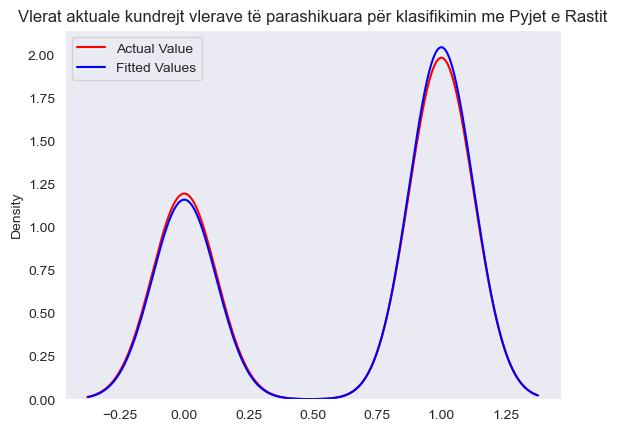

In [273]:
fig, ax = plt.subplots()
sns.kdeplot(predictions, color="r", label="Actual Value", ax=ax)
sns.kdeplot(y_pred1, color="b", label="Fitted Values", ax=ax)
ax.set_title('Vlerat aktuale kundrejt vlerave të parashikuara për klasifikimin me Pyjet e Rastit')
ax.legend()

## Raporti i klasifikimit

In [274]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.99      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       318
           1       0.97      0.99      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [275]:
f1_dtree=f1_score(dtree_pred,y_test)
f1_dtree

0.9879069767441859

In [276]:
f1_rfc=f1_score(rfc_pred,y_test)
f1_rfc

0.9787234042553191

In [277]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Decision Tree Classifier
print('Klasifikimi me Pemët e Vendimit')
print('R2 score: ', r2_score(y_test, dtree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, dtree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtree_pred))
print('F1 SCORE of Decision Tree is',f1_dtree)
print('\n')
# Random Forest Classifier
print('Klasifikimi me  Pyjet e Rastit')
print('R2 score: ', r2_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))
print('F1 SCORE of Random Forest is',f1_rfc)

Klasifikimi me Pemët e Vendimit
R2 score:  0.9348657655120624
Mean Squared Error:  0.01522248243559719
Mean Absolute Error:  0.01522248243559719
F1 SCORE of Decision Tree is 0.9879069767441859


Klasifikimi me  Pyjet e Rastit
R2 score:  0.8847625082136487
Mean Squared Error:  0.026932084309133488
Mean Absolute Error:  0.026932084309133488
F1 SCORE of Random Forest is 0.9787234042553191


## Konkluzioni
Si përfundim, eksplorimi në modelet e Machine Learning përfshinte përdorimin e Klasifikimit me Pemët e Vendimit dhe Klasifikimit me Pyjet e Rastit. Është vërtet e jashtëzakonshme që të dy modelet dhanë rezultate të shkëlqyera, duke demonstruar potencialin e tyre për të analizuar dhe klasifikuar në mënyrë efektive të dhënat. Normat e saktësisë së arritur,` 91,4% për Klasifikimin me Pemët së Vendimite` dhe `89,4% për Klasifikimin me Pyjet e rastit`, vërtetojnë aftësinë e këtyre algoritmeve në bërjen e parashikimeve të sakta.